In [5]:
import numpy as np
import matplotlib.pyplot as plt

We are interested in the problem of estimating:
$$ I_\lambda=\frac1{\sqrt{2\pi}}\int_{-\infty}^{+\infty} \frac{e^{-\frac{x^2}{2}}}{1+\lambda x^2}\text dx=\mathbb E\left[\frac1{1+\lambda G^2}\right]$$

Where $G\sim \mathcal N(0,1)$.

We will compare two statistical estimators of this quantity, the naïve Monte-Carlo estimator, and the control-variate estimator. Let us first define the following.

A sequence of i.i.d. standard gaussian variables:
$$(G_i)_{i\geq 0}\sim \mathcal N(0,1)^{\otimes \mathbb N}$$

Two i.i.d. sequence defined by:
$$(X_i)_{i\geq 0},\ (Y_i)_{i\geq 0},\ X_i=\frac{1}{1+\lambda G_i^2},\ Y_i=1-\lambda G_i^2$$

Denote the respective variances of $X_i$ and $Y_i$ by $\sigma_X^2$ and $\sigma_Y^2$.
The naïve Monte-Carlo estimator is defined, for $n\in \mathbb N$, by:
$$\hat{I_n}^{\text{MC}}=\frac 1n\sum_{i=0}^{n-1}X_i$$

Since $X_0$ is almost surely bounded (by $1$), the strong law of large numbers and the definition of $I_\lambda$ imply this is a strongly consistent (and obviously unbiased) estimator of $I_\lambda$. Let us note
$$\operatorname{Var}\left( \hat{I_n}^{\text{MC}}\right)=\frac1n\sigma_X^2$$

Whence we infer by the Central Limit Theorem that $$\sqrt{n}\left( \hat{I_n}^{\text{MC}}-I_\lambda\right) \overset{\mathcal L}{\underset{n\to\infty}\implies} \mathcal N(0,\sigma_X^2)$$

This gives a baseline asymptotic variance to work against. The idea of the control variate proceeds from the observation that for every random variable $Z\in L^1$ and real parameter $\beta$, the following holds:

$$ \mathbb E\left[ {X-\beta Z + \beta\mathbb E \left[ Z\right]}\right]= I_\lambda$$

The idea is to choose $Z$ skilfully, in order to have that:\
$\mathbb E \left[Z\right]$ is known analytically.\
The variance of the above quantity, $\operatorname{Var}(X-\beta Z)$, is smaller than $\sigma_X^2$\
In fact, we have
$$\operatorname{Var}\left(X-\beta Z\right)=\operatorname{Var}\left(X\right)-2\beta\operatorname{Cov}\left(X,Z\right)+\beta^2\operatorname{Var}\left(Z\right)$$

Minimizing this quantity as a function of $\beta$ yields easily the optimal 
$$ \beta^\star=\frac{\operatorname{Cov}\left(X,Z\right)}{\operatorname{Var}\left(Z\right)}$$

And thus the optimal variance is given by:
$$\operatorname{Var}\left(X-\beta^\star Z\right)=\operatorname{Var}\left(X\right)-2\beta^\star\operatorname{Cov}\left(X,Z\right)+{\beta^\star}^2\operatorname{Var}\left(Z\right)=\operatorname{Var}\left(X\right)-\frac{\operatorname{Cov}\left(X,Z\right)^2}{\operatorname{Var}\left(Z\right)}=\operatorname{Var}\left(X\right)-\operatorname{Var}\left(X\right)\rho_{X,Z}^2=\sigma_X^2\left(1-\rho_{X,Z}^2\right)$$
Where $\rho_{X,Z}$ is the Pearson correlation coefficient,

$$\rho_{X,Z}=\frac{\operatorname{Cov}\left(X,Z\right)}{\sqrt{\operatorname{Var}\left(X\right)\operatorname{Var}\left(Z\right)}}$$

In other words, as soon as $X$ and $Z$ have some non-zero correlation, we can get an estimator with a superior asymptotic variance than $\hat{I_n}^{\text{MC}}$:

$$\hat{I_n}^{\text{CV},\beta^\star}=\frac 1n\sum_{i=0}^{n-1}\left(X_i-\beta^\star Z_i\right)+\beta^\star\mathbb E\left[ Z\right]$$

Where the $(Z_i)_{i\in\mathbb N}$ are i.i.d. variables distributed like $Z$.\
Here, we aim to use this idea with $Z=Y$, but there is one catch, though: even though we have an expression for $\mathbb E \left[Y\right]=1-\lambda$, the expression for $\beta^\star$ involves the covariance term $\operatorname{Cov}\left(X,Y\right)$, which we have no reason to believe will be easier to compute than $\mathbb E\left[ X\right]=I_\lambda$!\
To get out of this circularity, we simply replace the covariance term with the empirical covariance:

$$\hat C_{n,X,Y}=\frac 1n \sum_{i=0}^{n-1}{\left(X_i-\overline{X_n}\right)\left(Y_i-\mathbb E\left[ Y\right]\right)}$$

Where $\overline{X_n}$ is the empirical mean, $\overline{X_n}=\frac 1n \sum_{i=0}^n X_i$\
Finally, observing that 
$$\operatorname{Var}\left(Y\right)=\lambda^2 \left( \mathbb E \left [ G^4\right] -1 \right)=2\lambda^2$$

and defining
$$\hat{\beta_n^\star}=\frac{\hat C_{n,X,Y}}{2\lambda^2}$$

We arrive at the definition of the control-variate estimator:

$$ \hat{I_n}^{\text{CV}} =\frac 1n\sum_{i=0}^{n-1}\left(X_i-\hat{\beta_n^\star} Y_i\right)+\hat{\beta_n^\star}\left(1-\lambda^2\right)$$

We leave the full analysis of this estimator to later, including the validity of substituting in the empirical covariance.

Let's code these up! First, a function to compute the empirical covariance term.

In [6]:
def Cov_hat(X,Y):
    return ((X-X.mean())*(Y-Y.mean())).mean()

Now we can define the Monte-Carlo estimator.

In [15]:
def MC_estimator(lambd,n_trials=100):
    G=np.random.standard_normal(n_trials)
    return (1/(1+lambd*G**2)).mean()

Now the control-variate estimator:

In [16]:
def CV_estimator(lambd,n_trials=100):
    G=np.random.standard_normal(n_trials)
    X=1/(1+lambd*G**2)
    Y=1-lambd*G**2
    sigma2_y=2*lambd**2
    C_XY_hat=Cov_hat(X,Y)
    beta_star_hat=C_XY_hat/sigma2_y
    return (X-beta_star_hat*Y).mean()+(1-lambd)*beta_star_hat

In [62]:
lambd=0.3
I_lambda_mc=MC_estimator(lambd,1000000)
I_lambda_cv=CV_estimator(lambd,1000000)
print(I_lambda_mc,I_lambda_cv)

0.8228641445457286 0.8225834631505122


Next we define a function to compute numerically the variances of these estimators as a function of $\lambda$.

In [23]:
def eval_estimator_variances(L,n_samples=2000,n_trials=100):
    MC_vars=np.array([n_trials*np.array([MC_estimator(lambd)for i in range(n_samples)]).std()**2 for lambd in L])
    CV_vars=np.array([n_trials*np.array([CV_estimator(lambd)for i in range(n_samples)]).std()**2 for lambd in L])
    
    return MC_vars,CV_vars

In [25]:
L=np.linspace(0.1,10,200)
M,C=eval_estimator_variances(L)

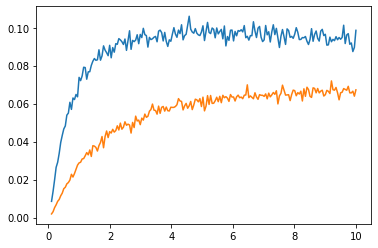

In [26]:
plt.plot(L,M)
plt.plot(L,C)

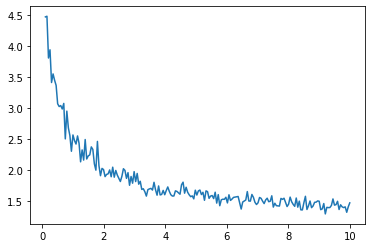

In [27]:
plt.plot(L,M/C)

We observe the quality of the control variate estimator relative to the naive Monte-Carlo declines rapidly as lambda grows. We can take a punt that this is due to the correlation between X and Y being lost as lambda increases. Let us verify this intuition numerically.

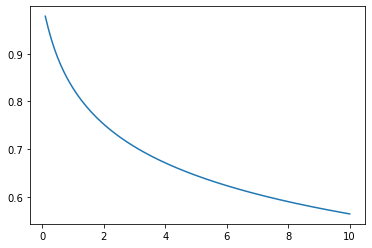

In [28]:
G=np.random.standard_normal(1000)
correlations=[]
for l in L:
    X=1/(1+l*G**2)
    Y=1-l*G**2
    rho_hat=Cov_hat(X,Y)/(X.std()*Y.std())
    correlations.append(rho_hat)
correlations=np.array(correlations)
plt.plot(L,correlations)

We indeed observe a decrease in correlation between $X$ and $Y$ as $\lambda$ increases. This can be intuitively understood by viewing $Y=1-\lambda G^2$ as a first-order Taylor expansion (in $\lambda$) of $X=\frac{1}{1+\lambda G^2}$. For small $\lambda$, this linear approximation is precise, which translates into a strong correlation. For larger $\lambda$, the quality of this approximation degrades, which entails a loss of correlation, and thus of relative quality of the control-variate estimator: the theoretical analysis above gives that the ratio between the variance of the Monte-Carlo estimator and the variance of the optimal control-variate estimator is:
$$\frac{\sigma_{\text{MC}}^2}{\sigma_{\text{CV},\beta^*}^2}=\frac{1}{1-\rho_{X,Y}^2}$$

Let us verify this by comparing the theoretical ratio with the empirical ratio as a function of $\lambda$.

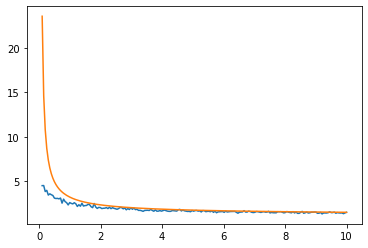

In [29]:
plt.plot(L,M/C)
plt.plot(L,1/(1-correlations**2))